<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#wczytywanie-danych-z-pliku-data/salary.csv" data-toc-modified-id="wczytywanie-danych-z-pliku-data/salary.csv-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>wczytywanie danych z pliku data/salary.csv</a></span></li><li><span><a href="#modelowanie" data-toc-modified-id="modelowanie-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>modelowanie</a></span></li><li><span><a href="#rysowanie-wykresu-regresji-liniowej" data-toc-modified-id="rysowanie-wykresu-regresji-liniowej-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>rysowanie wykresu regresji liniowej</a></span></li><li><span><a href="#r-kwadrat" data-toc-modified-id="r-kwadrat-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>r kwadrat</a></span></li><li><span><a href="#predykcja" data-toc-modified-id="predykcja-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>predykcja</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

# Modelowanie regresji liniowej w sklearn

### wczytywanie danych z pliku data/salary.csv

In [2]:
df = pd.read_csv("data/salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
x = df.YearsExperience.to_numpy() #jesli jest wiele zmiennych to X
y = df.Salary.to_numpy()

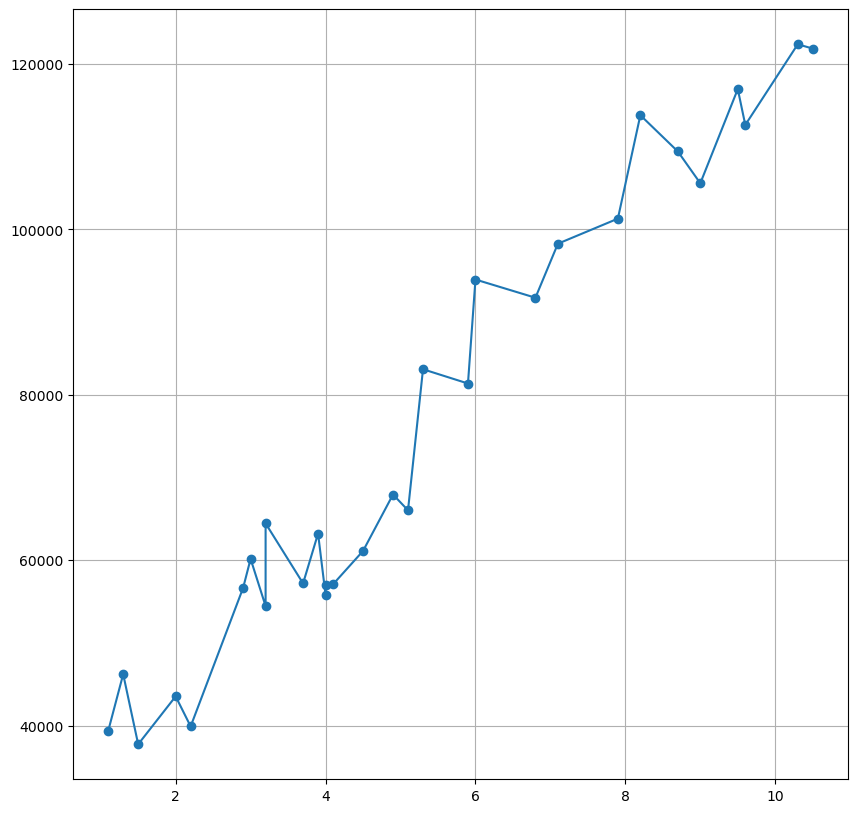

In [8]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y, marker = 'o')
plt.grid()
plt.show()

### modelowanie

In [9]:
#instancja klasy LinearRegression()
model = LinearRegression() # Tutaj by byly hiperparam modelu, ale dla LR ich nie ma :) 

In [10]:
x.shape

(30,)

In [11]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [12]:
x.reshape(-1,1) #-1 - numpy nam automatycznie wylicza wymiar

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
x.reshape(-1,1).shape

(30, 1)

In [15]:
x = x.reshape(-1,1)

In [16]:
y = y.reshape(-1,1)

In [19]:
model.fit(x,y) #tutaj dopasowujemy instancje, ktora mielismy wczesniej do danych

LinearRegression()

In [20]:
model.score(x,y) #r2 (bez uzycia metrics)

0.9569566641435086

### Rysowanie wykresu regresji liniowej

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
model.intercept_ #korzystamy z attributes

array([25792.20019867])

In [22]:
b = model.intercept_[0]
b

25792.20019866871

In [23]:
model.coef_

array([[9449.96232146]])

In [24]:
a = model.coef_[0][0]
a

9449.962321455074

In [26]:
def linear_function(a,b,x):
    """
    nasza funkcja liniowa"""
    return a*x + b

In [27]:
y_pred = linear_function(a,b,x)

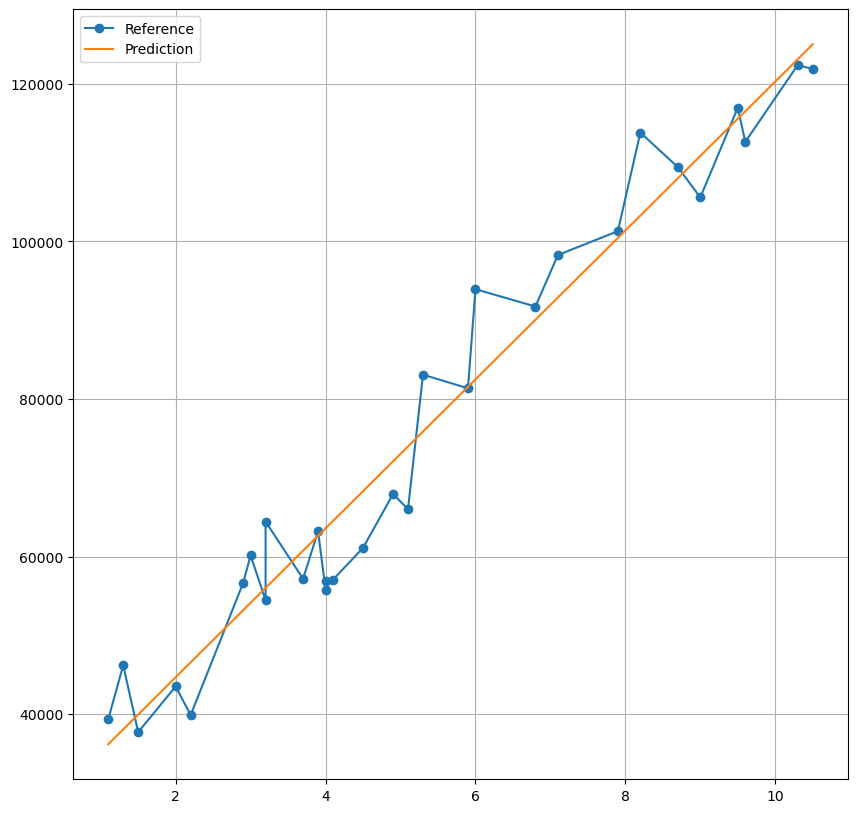

In [29]:
# Rysujemy wykres predykcja wersus eksperyment
fig = plt.figure(figsize = (10,10))
plt.plot(x,y, marker='o')
plt.plot(x, y_pred)
plt.grid()
plt.legend(['Reference', 'Prediction'])
plt.show()

In [30]:
yerr = y - y_pred

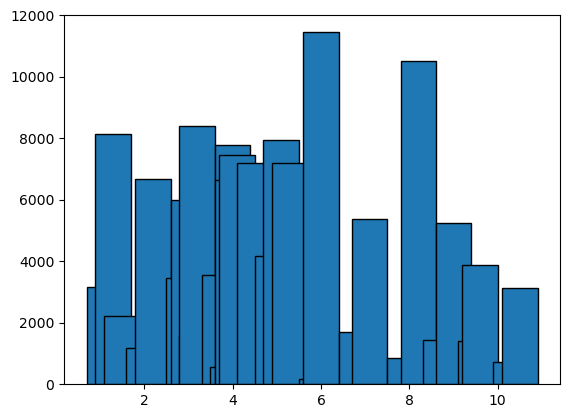

In [33]:
# Wykres reszt
plt.bar(x.reshape(-1), np.abs(yerr.reshape(-1)),edgecolor='black')
plt.show()

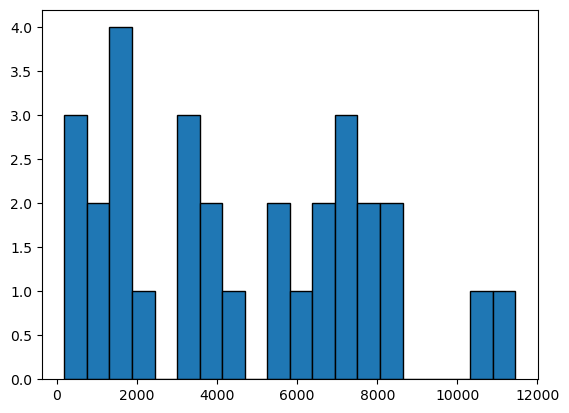

In [34]:
plt.hist(np.abs(yerr.reshape(-1)), bins=20,edgecolor='black')
plt.show()

### r kwadrat

In [31]:
from sklearn.metrics import r2_score

In [32]:
print('R^2 dla modelu liniowego:\n', r2_score(y, y_pred))

R^2 dla modelu liniowego:
 0.9569566641435086


### predykcja

In [35]:
x[-1][0]

10.5

In [37]:
x_tmp = np.array([x[-1][0], 15]).reshape(-1,1) # przedłużenie od ostatniego x
x_tmp

array([[10.5],
       [15. ]])

In [40]:
y_far_away = model.predict(x_tmp) # na podstawie modelu przewiduje wartosć y dla zadanego x
y_far_away

array([[125016.80457395],
       [167541.63502049]])

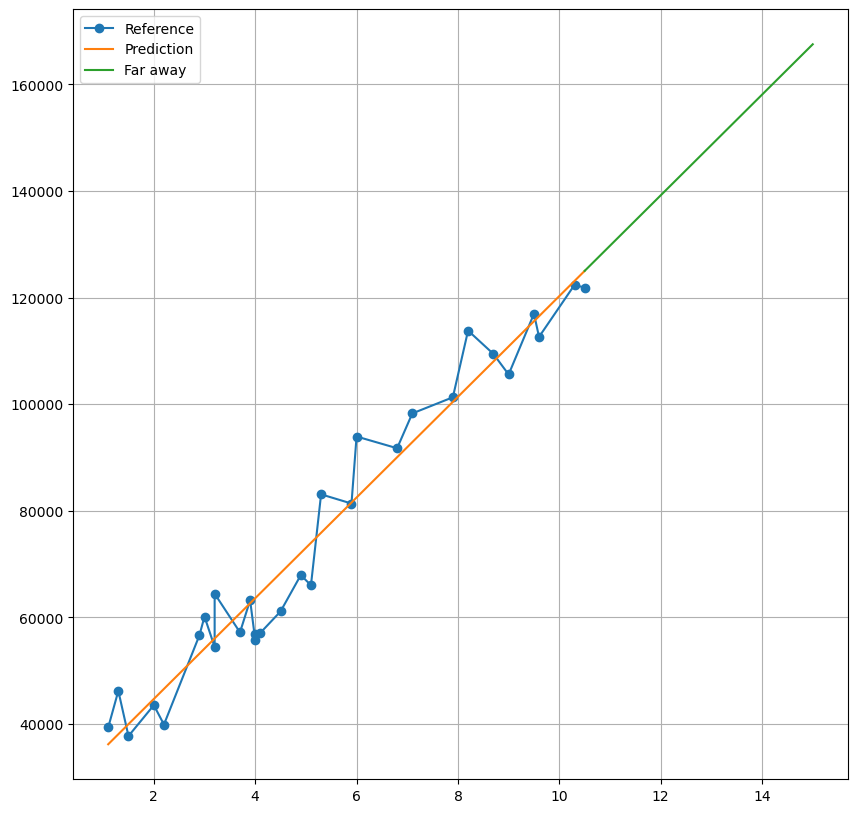

In [42]:
fig = plt.figure(figsize = (10,10))
plt.plot(x,y, marker='o')
plt.plot(x, y_pred)
plt.plot(x_tmp.reshape(-1), y_far_away.reshape(-1))
plt.grid()
plt.legend(['Reference', 'Prediction', 'Far away'])
plt.show()